<br>

# Clustering Algorithms
---

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width=1200 height=600></img>


In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

plt.rcParams["figure.figsize"] = 12, 5
plt.rcParams["font.family"] = "monospace"

In [26]:
import numpy as np
import pandas as pd
import vega_datasets as vd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')

In [27]:
from ucimlrepo import fetch_ucirepo 

<big>

## Online Shoppers Purchase Intention Dataset    

- The dataset consists of features belonging to 12,330 sessions
- Each session belongs to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period

> Can we find different types or profiles of sessions? <br>
Can you predict whether there was a transaction or not?

<br>

In [28]:
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 

<big>

## Data Introduction    

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

- The dataset also includes "operating system", "browser", "region", "traffic type", "visitor type" as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

<br>

In [30]:
X.loc[:, 'Administrative':'SpecialDay'].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
11527,2,15.000000,0,0.0,35,1776.083333,0.00,0.011429,0.000000,0.0
1344,0,0.000000,0,0.0,8,158.500000,0.00,0.050000,0.000000,0.0
11793,7,45.416667,0,0.0,35,653.859524,0.00,0.027350,19.784563,0.0
10359,0,0.000000,0,0.0,3,112.000000,0.00,0.033333,0.000000,0.0
1915,0,0.000000,0,0.0,5,1620.000000,0.14,0.166667,0.000000,0.0


In [31]:
X.loc[:, 'Month':].sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2893,May,2,6,3,2,Returning_Visitor,False
1560,Mar,2,2,2,3,Returning_Visitor,False
10891,Nov,2,2,1,1,Returning_Visitor,False
11999,Nov,3,2,1,13,Returning_Visitor,True
3234,May,2,2,6,4,Returning_Visitor,False


<big>

## Data Preparation    

- Continuous numeric data: Standardize

- Nominal numeric and Categorical data: Make dummies

<br>

In [29]:
X.select_dtypes(include=np.number).sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
10154,1,55.500000,0,0.0,8,158.250000,0.000000,0.022222,0.000000,0.0,2,2,3,10
5875,1,30.866667,3,7.0,15,398.256667,0.000000,0.025000,0.000000,0.0,1,1,3,2
11238,4,82.250000,6,144.0,82,3174.642793,0.004494,0.012081,0.000000,0.0,1,1,1,2
9683,6,167.000000,0,0.0,71,1445.458333,0.004054,0.013964,12.308117,0.0,3,2,1,10
7771,0,0.000000,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0.0,3,2,1,1
8225,7,490.500000,0,0.0,43,1286.916667,0.000000,0.010370,0.000000,0.0,2,2,3,1
5703,5,59.900000,2,8.0,84,2359.522438,0.016667,0.028710,3.478136,0.0,1,1,4,3
7151,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,2,1,1
6226,0,0.000000,0,0.0,5,60.900000,0.040000,0.120000,0.000000,0.0,1,1,1,3
11108,8,305.666667,1,0.0,35,796.250000,0.005556,0.011574,0.000000,0.0,1,1,3,10


## Categoricals

In [30]:
pd.get_dummies(X.loc[:, 'Month'], drop_first=True, prefix='month').astype(int).head()

,month_Dec,month_Feb,month_Jul,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [31]:
list_df_dummies = [
    pd.get_dummies(X.loc[:, col], drop_first=True, prefix=col)
    for col 
    in X.loc[:, 'Month':].columns
]

X_dummies = pd.concat(list_df_dummies, axis=1).astype(int)

In [32]:
X_dummies

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
12326,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
12327,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
12328,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Numerics

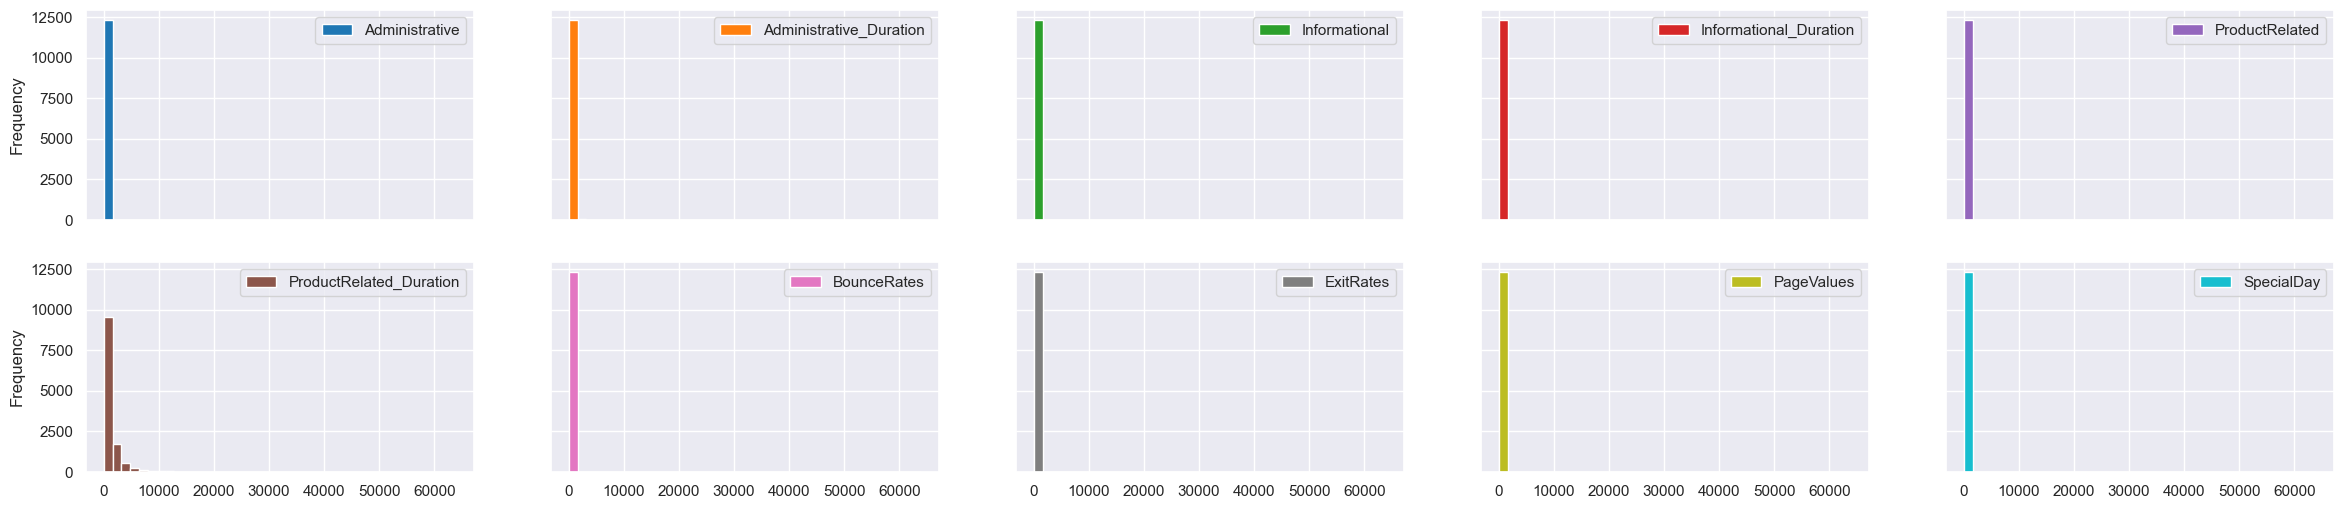

In [78]:
X.loc[:, 'Administrative':'SpecialDay'].plot.hist(subplots=True, layout=(2,5), figsize=(29, 6), bins=40, sharey=True);

In [79]:
X.loc[:, 'Administrative':'SpecialDay'].quantile([0.95, 0.99, 1]).T.round(1)

,0.95,0.99,1.00
Administrative,9.0,14.0,27.0
Administrative_Duration,348.3,830.6,3398.8
Informational,3.0,6.0,24.0
Informational_Duration,195.0,716.4,2549.4
ProductRelated,109.0,221.0,705.0
ProductRelated_Duration,4300.3,8701.1,63973.5
BounceRates,0.2,0.2,0.2
ExitRates,0.2,0.2,0.2
PageValues,38.2,85.5,361.8
SpecialDay,0.6,1.0,1.0


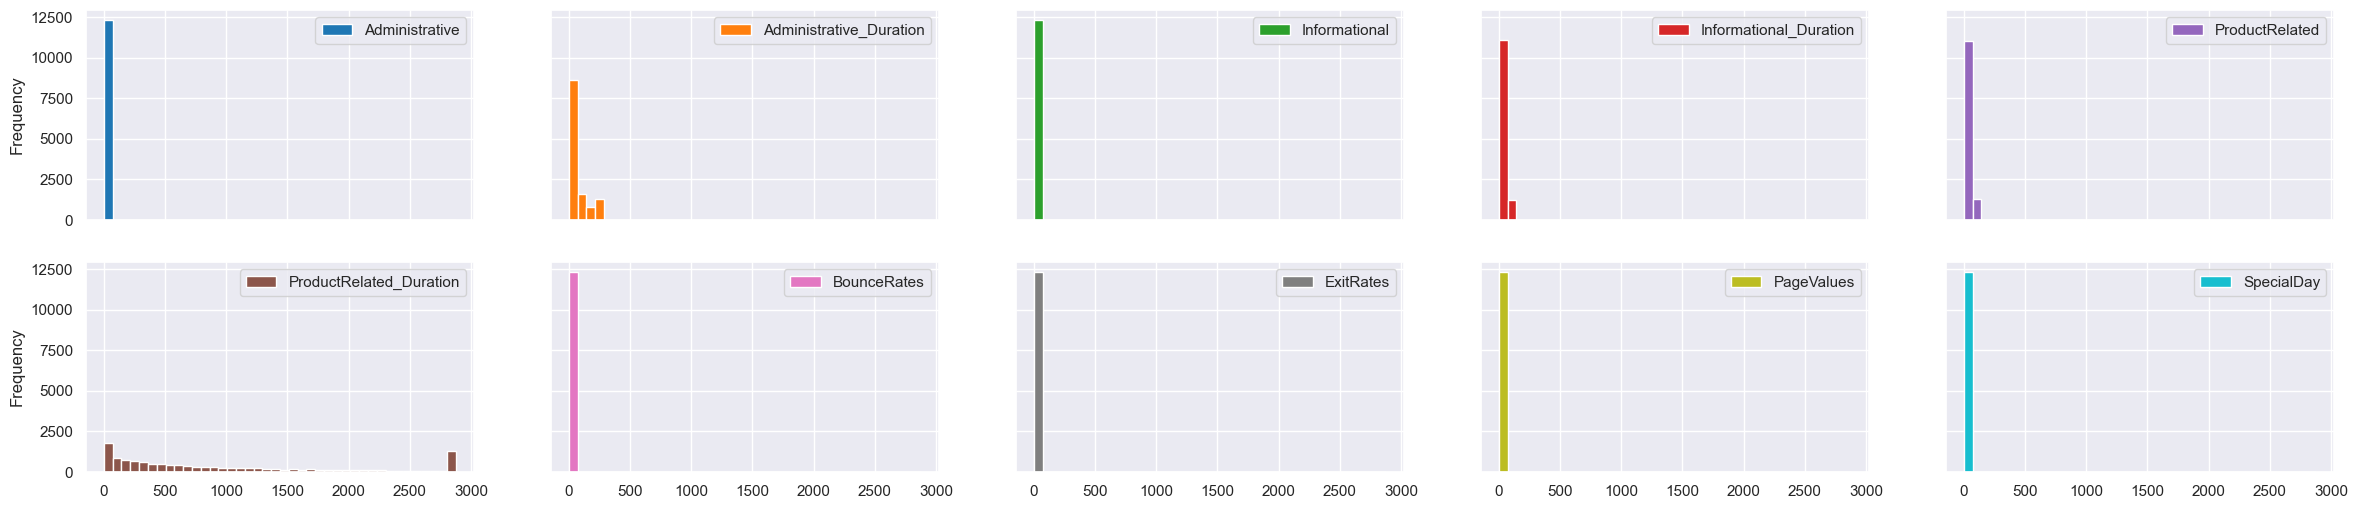

In [80]:
X.loc[:, 'Administrative':'SpecialDay'].apply(lambda col: col.clip(upper=col.quantile(0.9))).plot.hist(subplots=True, layout=(2,5), figsize=(29, 6), bins=40, sharey=True);

<br>

<big>

## Visualize in 2D
---

<br>

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [42]:
(X_dummies
    .mean()
    .where(lambda i: i > 0.05)
    .dropna()
    .index
    .tolist()
)

['Month_Dec',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'Browser_2',
 'Browser_4',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_6',
 'Region_7',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_13',
 'VisitorType_Returning_Visitor',
 'Weekend_True']

In [43]:
list_dummies_with_gt_5pc_data = X_dummies.mean().where(lambda i: i > 0.05).dropna().index.tolist()

In [44]:
X_numerics = X.loc[:, 'Administrative':'SpecialDay'].apply(lambda col: col.clip(upper=col.quantile(0.9)))

In [45]:
X_numerics_std = StandardScaler().fit_transform(X_numerics)

In [46]:
X_both = pd.concat([
    pd.DataFrame(data=X_numerics_std, index=X_numerics.index, columns=X_numerics.columns), 
    X_dummies.loc[:, list_dummies_with_gt_5pc_data]
], axis=1)

In [48]:
X_2d = PCA(n_components=2).fit_transform(X_both)

<Axes: xlabel='PC1', ylabel='PC2'>

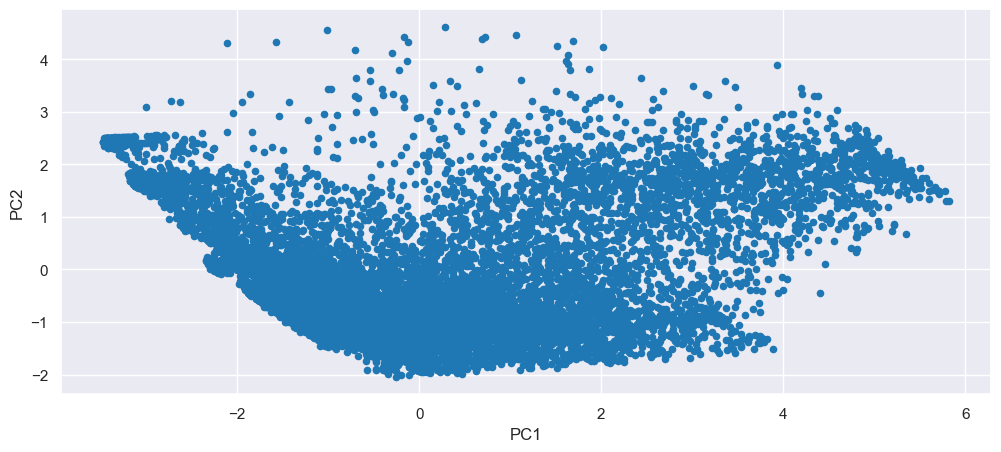

In [49]:
pd.DataFrame(data=X_2d, columns=['PC1', 'PC2']).plot.scatter(x='PC1', y='PC2')

In [50]:
from sklearn.manifold import Isomap, TSNE

In [54]:
X_sample = X_both.sample(frac=0.3)

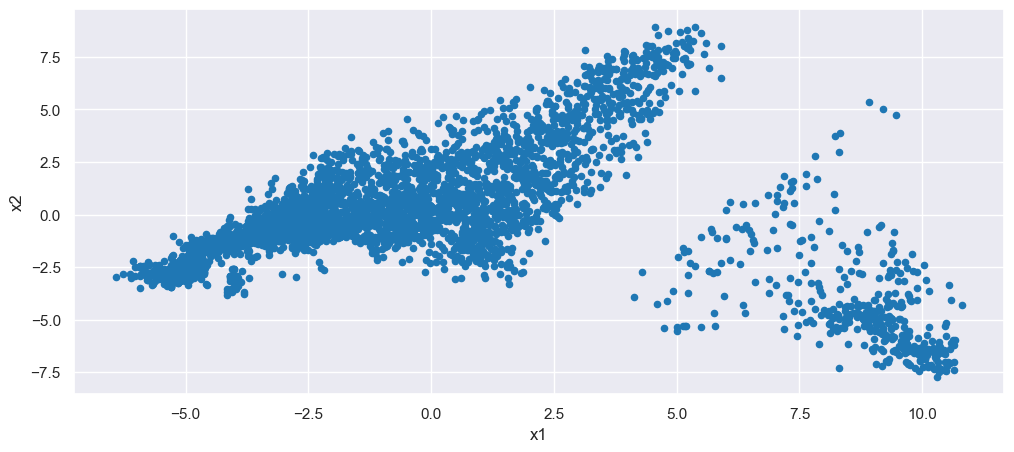

In [55]:
iso = Isomap(n_components=2, n_neighbors=50)
data_iso = iso.fit_transform(X_sample)

(pd.DataFrame(data_iso, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2'));

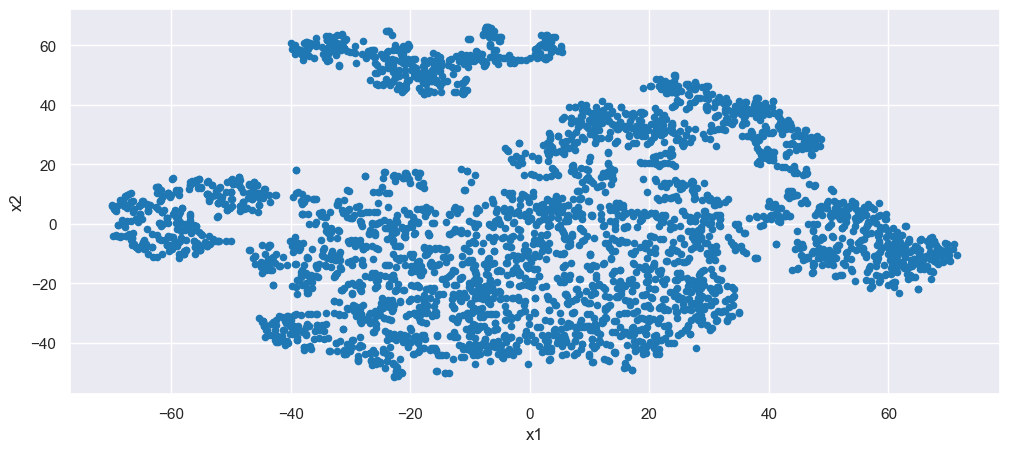

In [58]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(X_sample)

(pd.DataFrame(data_tsne, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2'));

<br>

<big>

## Visualize Clusters
---

<br>

In [57]:
from sklearn.cluster import KMeans

In [69]:
km = KMeans(n_clusters=8)

In [70]:
km.fit(X_sample)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


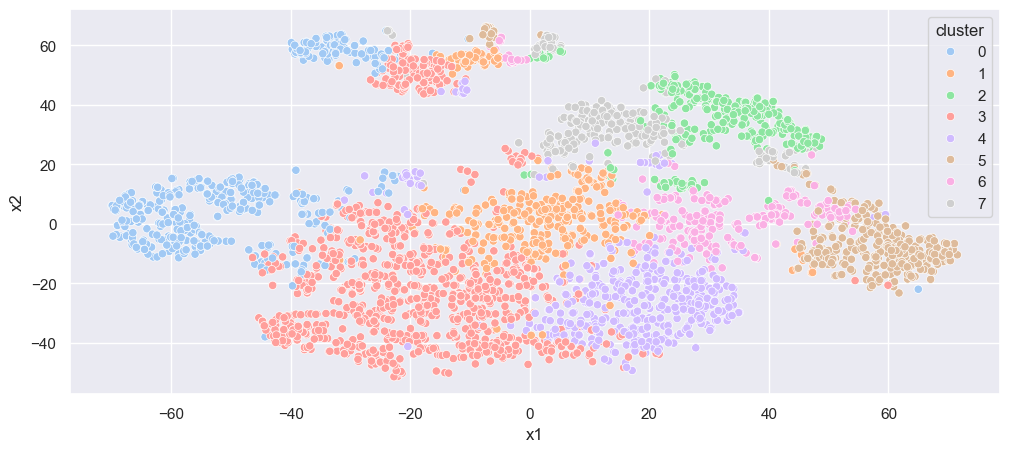

In [71]:
sns.scatterplot(data=pd.DataFrame(data=data_tsne, columns=['x1', 'x2']).assign(cluster=km.predict(X_sample)), x='x1', y='x2', hue='cluster', palette='pastel');

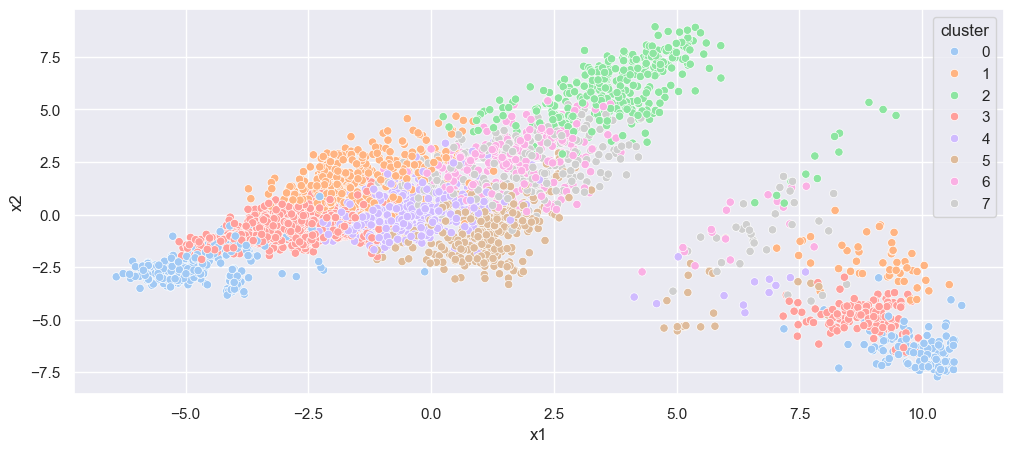

In [72]:
sns.scatterplot(data=pd.DataFrame(data=data_iso, columns=['x1', 'x2']).assign(cluster=km.predict(X_sample)), x='x1', y='x2', hue='cluster', palette='pastel');

<br>

<big>

## Cluster the whole dataset
---

<br>

In [92]:
km = KMeans(n_clusters=6)
km.fit(X_both)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [93]:
clusters = pd.Series(data=km.predict(X_both), index=X_both.index, name='clusters')

<br>

<big>

## Profile
---

<br>

In [94]:
df_profile_numerics = \
(X
.loc[:, :'SpecialDay']
.join(clusters)
.groupby('clusters')
.mean()
.T
.rename(columns=lambda i: f"Clus_{i}")
.round(2)
)

In [95]:
df_profile_nominals = \
pd.concat([
    (X[[col]]
        .join(clusters)
        .groupby('clusters')
        .value_counts(normalize=True)
        .unstack()
        .T
        .rename(index=lambda i: f"{col}: {i}")
    )
    for col
    in X.loc[:, 'Month':].columns
]).rename(columns=lambda i: f"Clus_{i}").round(2)

In [96]:
clusters.value_counts(normalize=True)

clusters
1    0.342822
5    0.176318
2    0.145255
3    0.125547
4    0.120195
0    0.089862
Name: proportion, dtype: float64

In [97]:
pd.concat([
    df_profile_numerics,
]).round(2).style.format('{:.1f}').background_gradient(cmap='Greens', axis=1)

clusters,Clus_0,Clus_1,Clus_2,Clus_3,Clus_4,Clus_5
Administrative,0.7,0.7,5.5,3.8,0.2,4.1
Administrative_Duration,19.9,14.2,203.2,121.9,8.9,160.4
Informational,0.1,0.1,2.9,0.2,0.0,0.1
Informational_Duration,3.6,1.3,227.5,2.0,1.4,1.3
ProductRelated,20.8,14.8,68.5,81.7,6.4,21.7
ProductRelated_Duration,687.4,502.7,2752.4,3173.0,207.5,780.0
BounceRates,0.0,0.0,0.0,0.0,0.1,0.0
ExitRates,0.1,0.0,0.0,0.0,0.1,0.0
PageValues,1.7,0.2,8.5,5.3,0.3,21.2
SpecialDay,0.6,0.0,0.0,0.0,0.0,0.0


In [98]:
df_profile_nominals.fillna(0).style.format('{:.0%}').background_gradient(cmap='Greens', axis=1)

clusters,Clus_0,Clus_1,Clus_2,Clus_3,Clus_4,Clus_5
Month: Aug,0%,3%,4%,5%,4%,4%
Month: Dec,0%,17%,14%,12%,15%,17%
Month: Feb,7%,2%,0%,0%,2%,0%
Month: Jul,0%,3%,4%,4%,5%,4%
Month: June,0%,2%,2%,3%,5%,2%
Month: Mar,0%,22%,14%,8%,18%,14%
Month: May,93%,20%,22%,17%,22%,23%
Month: Nov,0%,24%,31%,41%,23%,22%
Month: Oct,0%,4%,5%,6%,3%,8%
Month: Sep,0%,4%,4%,4%,2%,6%


In [101]:
y.join(clusters)

,Revenue,clusters
0,False,4
1,False,1
2,False,4
3,False,4
4,False,1
...,...,...
12325,False,5
12326,False,1
12327,False,4
12328,False,1


<br> 

## Selecting the correct value of n_clusters in KMeans
---

<br>

In [102]:
dict_inertia = {}

for N in range(3, 15):
    km_n = KMeans(n_clusters=N)
    km_n.fit(X_both)
    dict_inertia[N] = km_n.inertia_

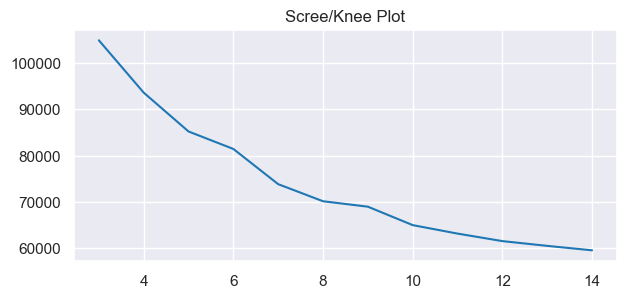

In [103]:
pd.Series(dict_inertia).plot(title='Scree/Knee Plot', figsize=(7, 3));

<br> 

## Other Clustering Algorithms to try
---

<br>

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering